In [1]:
import glob, os, json, re, unicodedata
from bs4 import BeautifulSoup


load_verbose = 0
loaded_labels = []
loaded_text = []
presidents = ["Barack Obama",
          "Donald J. Trump",
          "Dwight D. Eisenhower",
          "Franklin D. Roosevelt",
          "George Bush",
          "George W. Bush",
#          "Gerald R. Ford",
          "Harry S. Truman",
#          "Herbert Hoover",
          "Jimmy Carter",
          "John F. Kennedy",
          "Lyndon B. Johnson",
          "Richard Nixon",
          "Ronald Reagan",
          "William J. Clinton"]
labels = {}
for idx, name in enumerate(presidents):
    labels[name] = idx
'''
labels = {"Barack Obama": 0,
          "Donald J. Trump": 1,
          "Dwight D. Eisenhower": 2,
          "Franklin D. Roosevelt": 3,
          "George Bush": 4,
          "George W. Bush": 5,
          "Gerald R. Ford": 6,
          "Harry S. Truman": 7,
          "Herbert Hoover": 8,
          "Jimmy Carter": 9,
          "John F. Kennedy": 10,
          "Lyndon B. Johnson": 11,
          "Richard Nixon": 12,
          "Ronald Reagan": 13,
          "William J. Clinton": 14}

'''

# load raw text files straight in, no parsing
file_to_label = {"Obama": "Barack Obama", 
                     "Trump": "Donald J. Trump",
                     "Eisenhower": "Dwight D. Eisenhower",
                     "Roosevelt": "Franklin D. Roosevelt",
                     "Bush": "George Bush",
                     "WBush": "George W. Bush",
#                     "Ford": "Gerald R. Ford",
                     "Truman": "Harry S. Truman",
#                     "Hoover": "Herbert Hoover",
                     "Carter": "Jimmy Carter",
                     "Kennedy": "John F. Kennedy",
                     "Johnson": "Lyndon B. Johnson",
                     "Nixon": "Richard Nixon",
                     "Reagan": "Ronald Reagan",
                     "Clinton": "William J. Clinton"
                    }

directory = "../data/processed/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
    arr = filename.replace(directory,'').split("_")
    if any(prefix in arr[0] for prefix in file_to_label.keys()):
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 
    else:
        print "Skipping ", filename

print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."
# processed2 now contains files generated from unprocessed
directory = "../data/processed3/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
    arr = filename.replace(directory,'').split("_")
    if any(prefix in arr[0] for prefix in file_to_label.keys()):
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 
    else:
        print "Skipping ", filename

print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."

Loaded 25 speeches for 2 presidents.
Skipping  ../data/processed3/Ford_NewsConf1232_April31975.txt
Skipping  ../data/processed3/Hoover_NewsConf175_February241931.txt
Skipping  ../data/processed3/Hoover_NewsConf7_March261929.txt
Skipping  ../data/processed3/Hoover_NewsConf19_May71929.txt
Skipping  ../data/processed3/Hoover_NewsConf197_July61931.txt
Skipping  ../data/processed3/Hoover_NewsConf95_March71930.txt
Skipping  ../data/processed3/Hoover_NewsConf243_April151932.txt
Skipping  ../data/processed3/Hoover_NewsConf121_June271930.txt
Skipping  ../data/processed3/Hoover_NewsConf5_March191929.txt
Skipping  ../data/processed3/Hoover_NewsConf228_January121932.txt
Skipping  ../data/processed3/Ford_NewsConf1251_April291976.txt
Skipping  ../data/processed3/Hoover_NewsConf43_August131929.txt
Skipping  ../data/processed3/Hoover_NewsConf199_July141931.txt
Skipping  ../data/processed3/Ford_NewsConf1226_January211975.txt
Skipping  ../data/processed3/Hoover_NewsConf151_November71930.txt
Skipping  ..

In [2]:
import numpy as np
# summary stats & chop up into smaller
#print "Loaded", len(input_text), "speeches for", len(set(input_labels)), "presidents."

print "\nHow many speeches per president?"
speech_freq = np.bincount(loaded_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", speech_freq[value]
  
print "\nApproximately many words of text per president?"
vocab = set()
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", sum(len(speech.split()) for speech in label_speeches)


print "\nApproximately how many average words per speech per president?"
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", (sum(len(speech.split()) for speech in label_speeches)) / speech_freq[value]



How many speeches per president?
0  : Barack Obama         	148
1  : Donald J. Trump      	17
2  : Dwight D. Eisenhower 	192
3  : Franklin D. Roosevelt 	223
4  : George Bush          	97
5  : George W. Bush       	54
6  : Harry S. Truman      	301
7  : Jimmy Carter         	59
8  : John F. Kennedy      	63
9  : Lyndon B. Johnson    	134
10 : Richard Nixon        	39
11 : Ronald Reagan        	46
12 : William J. Clinton   	62

Approximately many words of text per president?
0  : Barack Obama         	858771
1  : Donald J. Trump      	80212
2  : Dwight D. Eisenhower 	569796
3  : Franklin D. Roosevelt 	386250
4  : George Bush          	348692
5  : George W. Bush       	313253
6  : Harry S. Truman      	377745
7  : Jimmy Carter         	224316
8  : John F. Kennedy      	239948
9  : Lyndon B. Johnson    	420226
10 : Richard Nixon        	177240
11 : Ronald Reagan        	178085
12 : William J. Clinton   	319522

Approximately how many average words per speech per president?
0  : Barack Oba

In [3]:
import nltk.data
from scipy import stats

# parse speeches into sentences and see what we have
input_text = []
input_labels = []

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
for idx in range(0,len(loaded_text)):
    speech = loaded_text[idx]
    label = loaded_labels[idx]
    parsed_sentences = sent_detector.tokenize(speech.strip())
    input_text = input_text + parsed_sentences
    input_labels = input_labels + ([label]*len(parsed_sentences))

print "Parsed ", len(input_text), "sentences, applying", len(input_labels), "labels."

print "\nHow many sentences of text per president?"
sentence_label_count = np.bincount(input_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", sentence_label_count[value]

print "\nSummary stats of sentence counts"
print stats.describe(sentence_label_count)

max_sentence_len_char = len(max(input_text, key=len))
max_sentence_len_word = len(max(input_text, key=len).split())

print "\nMaximum sentence length (characters):", max_sentence_len_char
print "Maximum sentence length (words):", max_sentence_len_word
print "\nLongest sentence:", max(input_text, key=len)

Parsed  248545 sentences, applying 248545 labels.

How many sentences of text per president?
0  : Barack Obama         	42301
1  : Donald J. Trump      	6648
2  : Dwight D. Eisenhower 	24844
3  : Franklin D. Roosevelt 	25746
4  : George Bush          	21344
5  : George W. Bush       	20148
6  : Harry S. Truman      	30227
7  : Jimmy Carter         	10872
8  : John F. Kennedy      	10635
9  : Lyndon B. Johnson    	23345
10 : Richard Nixon        	7443
11 : Ronald Reagan        	8972
12 : William J. Clinton   	16020

Summary stats of sentence counts
DescribeResult(nobs=13, minmax=(6648, 42301), mean=19118.846153846152, variance=108813797.97435898, skewness=0.6585490529108132, kurtosis=-0.17392733534879934)

Maximum sentence length (characters): 1364
Maximum sentence length (words): 245

Longest sentence: And throughout this process, based on hours of meetingsif you tallied it up, days or weeks of meetings where we went through every option in painful detail, with maps, and we had our mil

In [4]:
# adjust sentence volumes 
from operator import itemgetter 

# approach here is too simplistic but it suffices for now:
#   If <= threshold, take all; else just pick first threshold # of sentences sentences

sentence_max_threshold = 15000

trimmed_text = []
trimmed_labels = []
sentence_label_count = np.bincount(input_labels)

for key, value in sorted(labels.iteritems()):
    # grab all values of a specific label
    subset_text = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_text))
    subset_labels = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_labels))

    if sentence_label_count[value] <= sentence_max_threshold:
        print str(value).ljust(2), ":", key.ljust(20), "\t", "copy", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    else:
        subset_text = subset_text[0:sentence_max_threshold]
        subset_labels = subset_labels[0:sentence_max_threshold]
        print str(value).ljust(2), ":", key.ljust(20), "\t", "trim", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    trimmed_text = trimmed_text + subset_text
    trimmed_labels = trimmed_labels + subset_labels

# free up some memory
subset_labels = None
subset_text = None

print "\nSentences trimmed from", len(input_text), "to", len(trimmed_text)
print "\nLabels trimmed from", len(input_labels), "to", len(trimmed_labels)

0  : Barack Obama         	trim 	42301  now at: 15000
1  : Donald J. Trump      	copy 	6648   now at: 6648
2  : Dwight D. Eisenhower 	trim 	24844  now at: 15000
3  : Franklin D. Roosevelt 	trim 	25746  now at: 15000
4  : George Bush          	trim 	21344  now at: 15000
5  : George W. Bush       	trim 	20148  now at: 15000
6  : Harry S. Truman      	trim 	30227  now at: 15000
7  : Jimmy Carter         	copy 	10872  now at: 10872
8  : John F. Kennedy      	copy 	10635  now at: 10635
9  : Lyndon B. Johnson    	trim 	23345  now at: 15000
10 : Richard Nixon        	copy 	7443   now at: 7443
11 : Ronald Reagan        	copy 	8972   now at: 8972
12 : William J. Clinton   	trim 	16020  now at: 15000

Sentences trimmed from 248545 to 164570

Labels trimmed from 248545 to 164570


In [5]:
## USE NLTK Tokenizer instead?

from sklearn.cross_validation import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

#max_words = len(tokenizer.word_counts) #15000

tokenizer = Tokenizer(num_words=None, #max_words, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(trimmed_text)
tokenized_text = tokenizer.texts_to_sequences(trimmed_text)


X = sequence.pad_sequences(tokenized_text, maxlen=max_sentence_len_word)
y = to_categorical(trimmed_labels)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=45)

print "Prepared training (", len(train_X), "records) and test (", len(test_X), "records) data sets."

/home/thongnbui/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


Prepared training ( 131656 records) and test ( 32914 records) data sets.


In [6]:
import collections

print X.shape, y.shape, train_X.shape, train_y.shape, len(tokenizer.word_counts), len(tokenized_text)

x_count = collections.Counter()
for i in range(len(test_y)):
    x_count.update({str(test_y[i]): 1})

for key, value in sorted(x_count.iteritems(), reverse=True):
    print key, value, float(value)/sentence_max_threshold


(164570, 245) (164570, 13) (131656, 245) (131656, 13) 35820 164570
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 3038 0.202533333333
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 1330 0.0886666666667
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 2972 0.198133333333
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 2984 0.198933333333
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] 2993 0.199533333333
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] 3016 0.201066666667
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] 3049 0.203266666667
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] 2119 0.141266666667
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] 2093 0.139533333333
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.] 2956 0.197066666667
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.] 1489 0.0992666666667
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.] 1829 0.121933333333
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

### Use Keras_Sentence_RNN.py to avoid time-out problem
If the trained model runs too long, it will time out. To get around this issue, you can skip the run here and instead use Keras_Sentence_RNN.py to train and save the model, then load the saved model here to predict the data.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SimpleRNN, Dropout

max_features = len(tokenizer.word_counts) + 1 # + 1 is for padded word id 0s
batch_size = 100

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 100, input_length=max_sentence_len_word))
model.add(SimpleRNN(100,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad',metrics=['categorical_accuracy'])
print(model.summary())

model.fit(train_X, y=train_y, batch_size=batch_size, nb_epoch=20, verbose=1)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 245, 100)          3582100   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)                1313      
Total params: 3,603,513
Trainable params: 3,603,513
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
131656/131656 [==============================] - 250s - loss: 2.5528 - categorical_accuracy: 0.1323     

In [10]:
#from keras.models import load_model

# Load the model you trained Keras_Sentence_RNN.py here to predict on test data
#model = load_model('model_40.h5')

In [11]:
# Evaluate performance
print "Evaluating test data..."
loss_and_metrics = model.evaluate(test_X, test_y)
print model.metrics_names
print loss_and_metrics

# Make some predictions
print "\nPredicting using test data..."
pred_y = model.predict(test_X, batch_size=batch_size, verbose=1)
pred_y_collapsed = np.argmax(pred_y, axis=1)
test_y_collapsed = np.argmax(test_y, axis=1)

print "Done prediction."

Evaluating test data...
32914/32914 [==============================] - 34s     

Confusion matrix, without normalization
[[1932  148   47   50  126  294   48   52   37   46    6   48  204]
 [ 194  646   62   91   43  126   42   13    7   17    2   29   58]
 [  48   67 1586  220   82   34  283   27  120  210   81   57  157]
 [  52   55  265 1984   59   81  190   34   47  109   36   20   52]
 [ 239   51   94   99 1295  292  168   93   67   73   27  181  314]
 [ 332  112   31  104  166 1804   96   89   23   60    5   36  158]
 [  46   28  231  342   76   50 1791   46   78  256   32   20   53]
 [  95   32   40   69  130  135   61  969  126  149  108  102  103]
 [  81   14  159   96   83   34  142   84  950  261   80   34   75]
 [  77   21  219  204   72   83  264   84  191 1465   98   26  152]
 [  20   25  180   99   51   28   72  104  113  159  532   59   47]
 [ 169   53  131   66  263  101   96  152   66   47   77  450  158]
 [ 401   73  163   94  291  343  132   76   79  157   23   84 1130]]


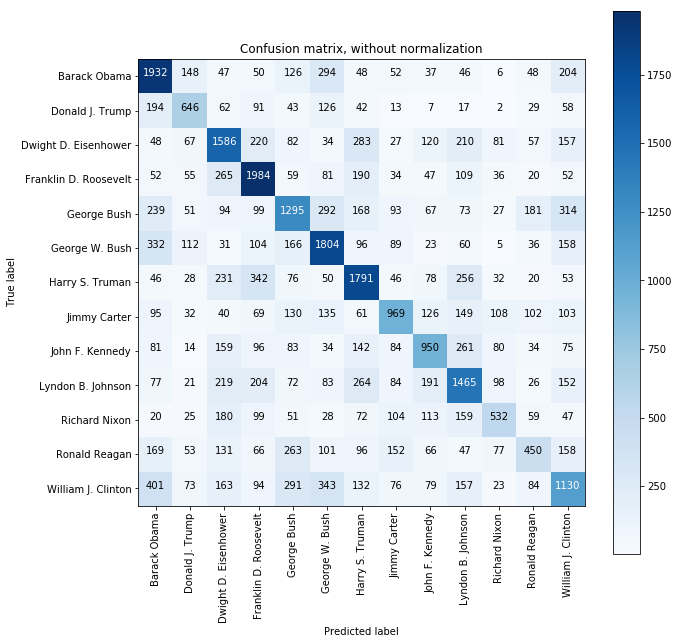

In [12]:
# from scikit-learn examples @
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y_collapsed, pred_y_collapsed)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)),
                      title='Confusion matrix, without normalization')

# #Plot normalized confusion matrix
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)), normalize=True,
#                       title='Normalized confusion matrix')

plt.show()